## Business Case: Employee Performance Prediction

### Following points are covered in this project:
#### 1. Department wise performances
#### 2. Top 3 important factors effecting employee  performance
#### 3. A predictive model to predict the employee performance
#### 4. Recommendations to improve employee performance based on insights from analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('D:/Final Projects/IABAC project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

### Dropping irrelevant features

In [3]:
data.drop('EmpNumber', inplace=True, axis=1)

## Department wise performance

<Axes: xlabel='PerformanceRating', ylabel='EmpDepartment'>

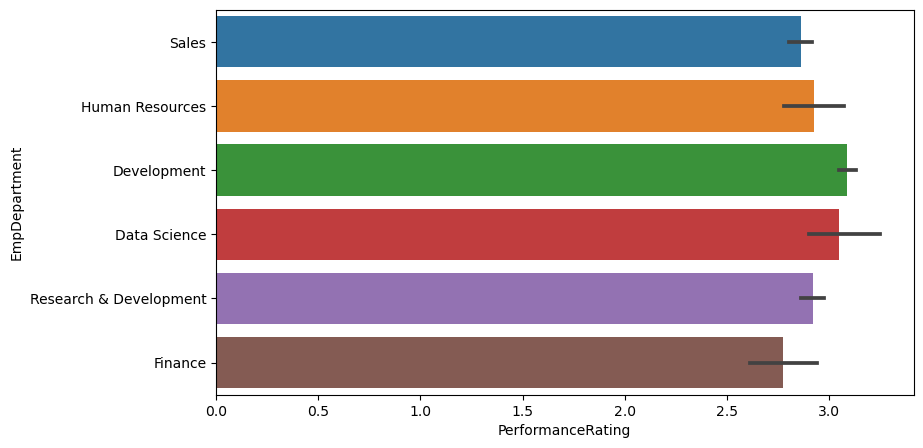

In [4]:
plt.figure(figsize=(9,5))
sns.barplot(x = 'PerformanceRating', y = 'EmpDepartment', data=data)

As we can see that 'Development' department is performing best among all others following by "Data Science"

### Checking correlations using heatmap

<Axes: >

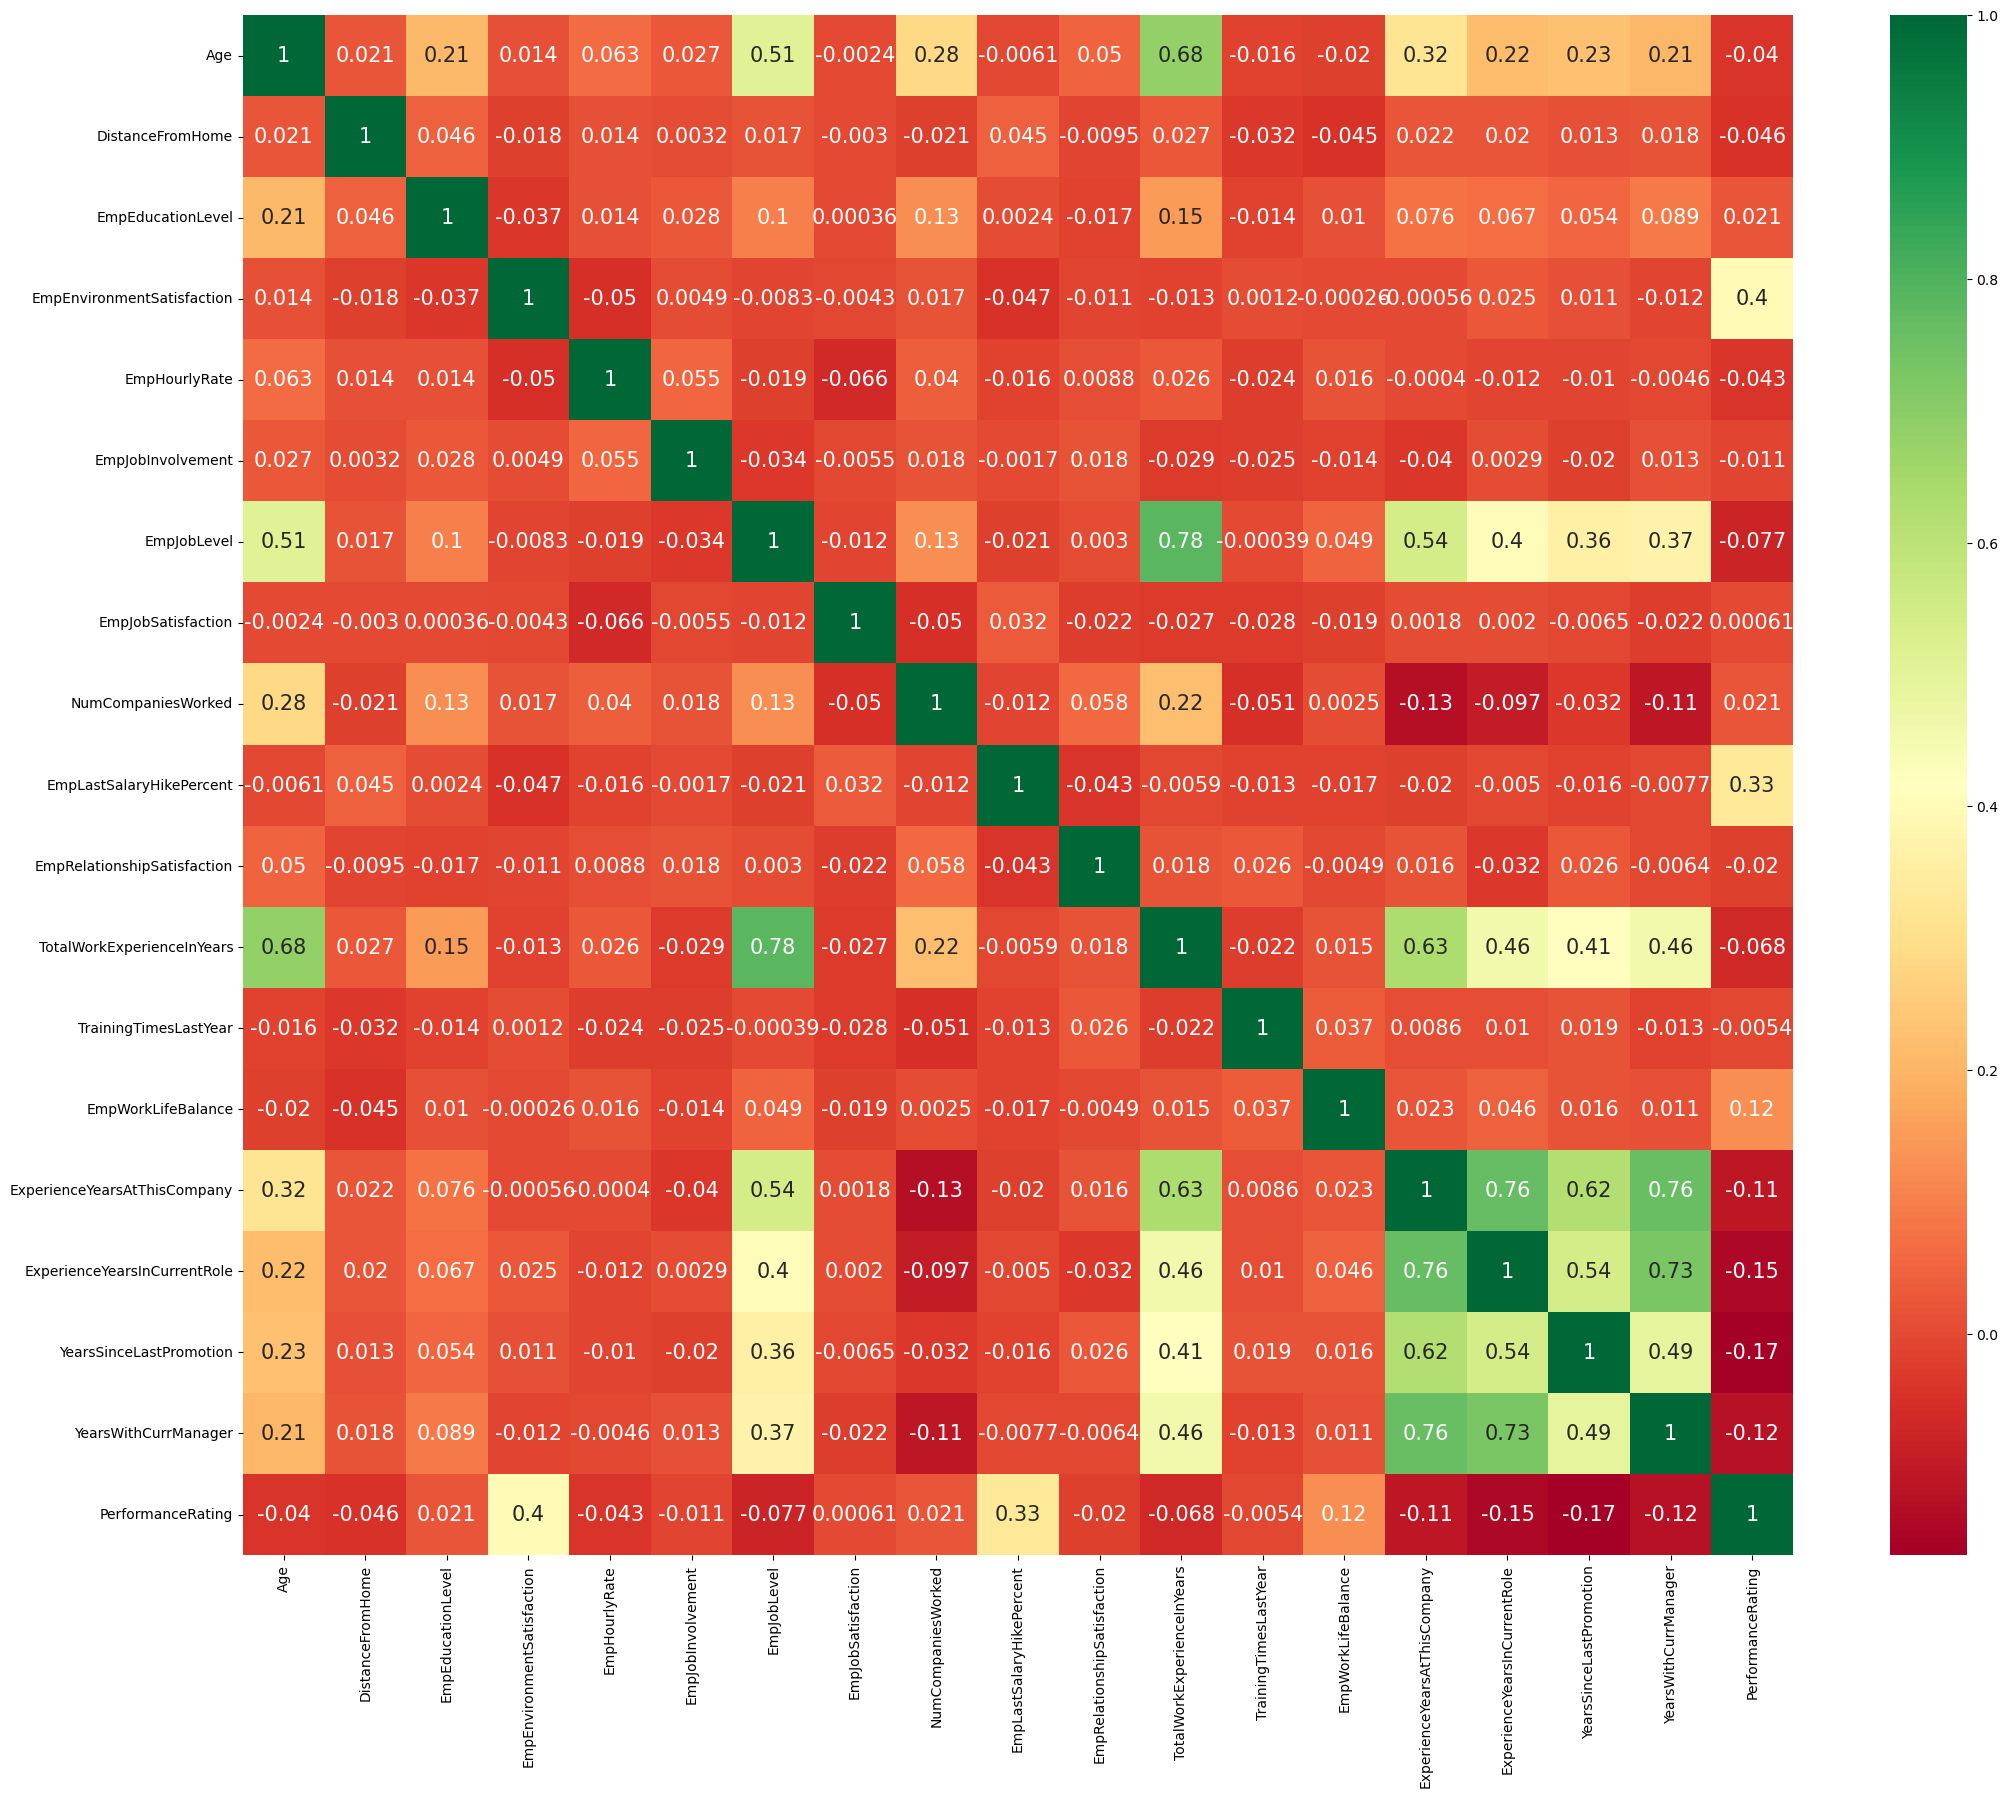

In [5]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})

There aren't any highly correlating features

# Exploratory Data Analysis

## Univariate Analysis

In [6]:
import sweetviz as sv #importing sweetviz library
my_report = sv.analyze(data) #syntax to use sweetviz
my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis

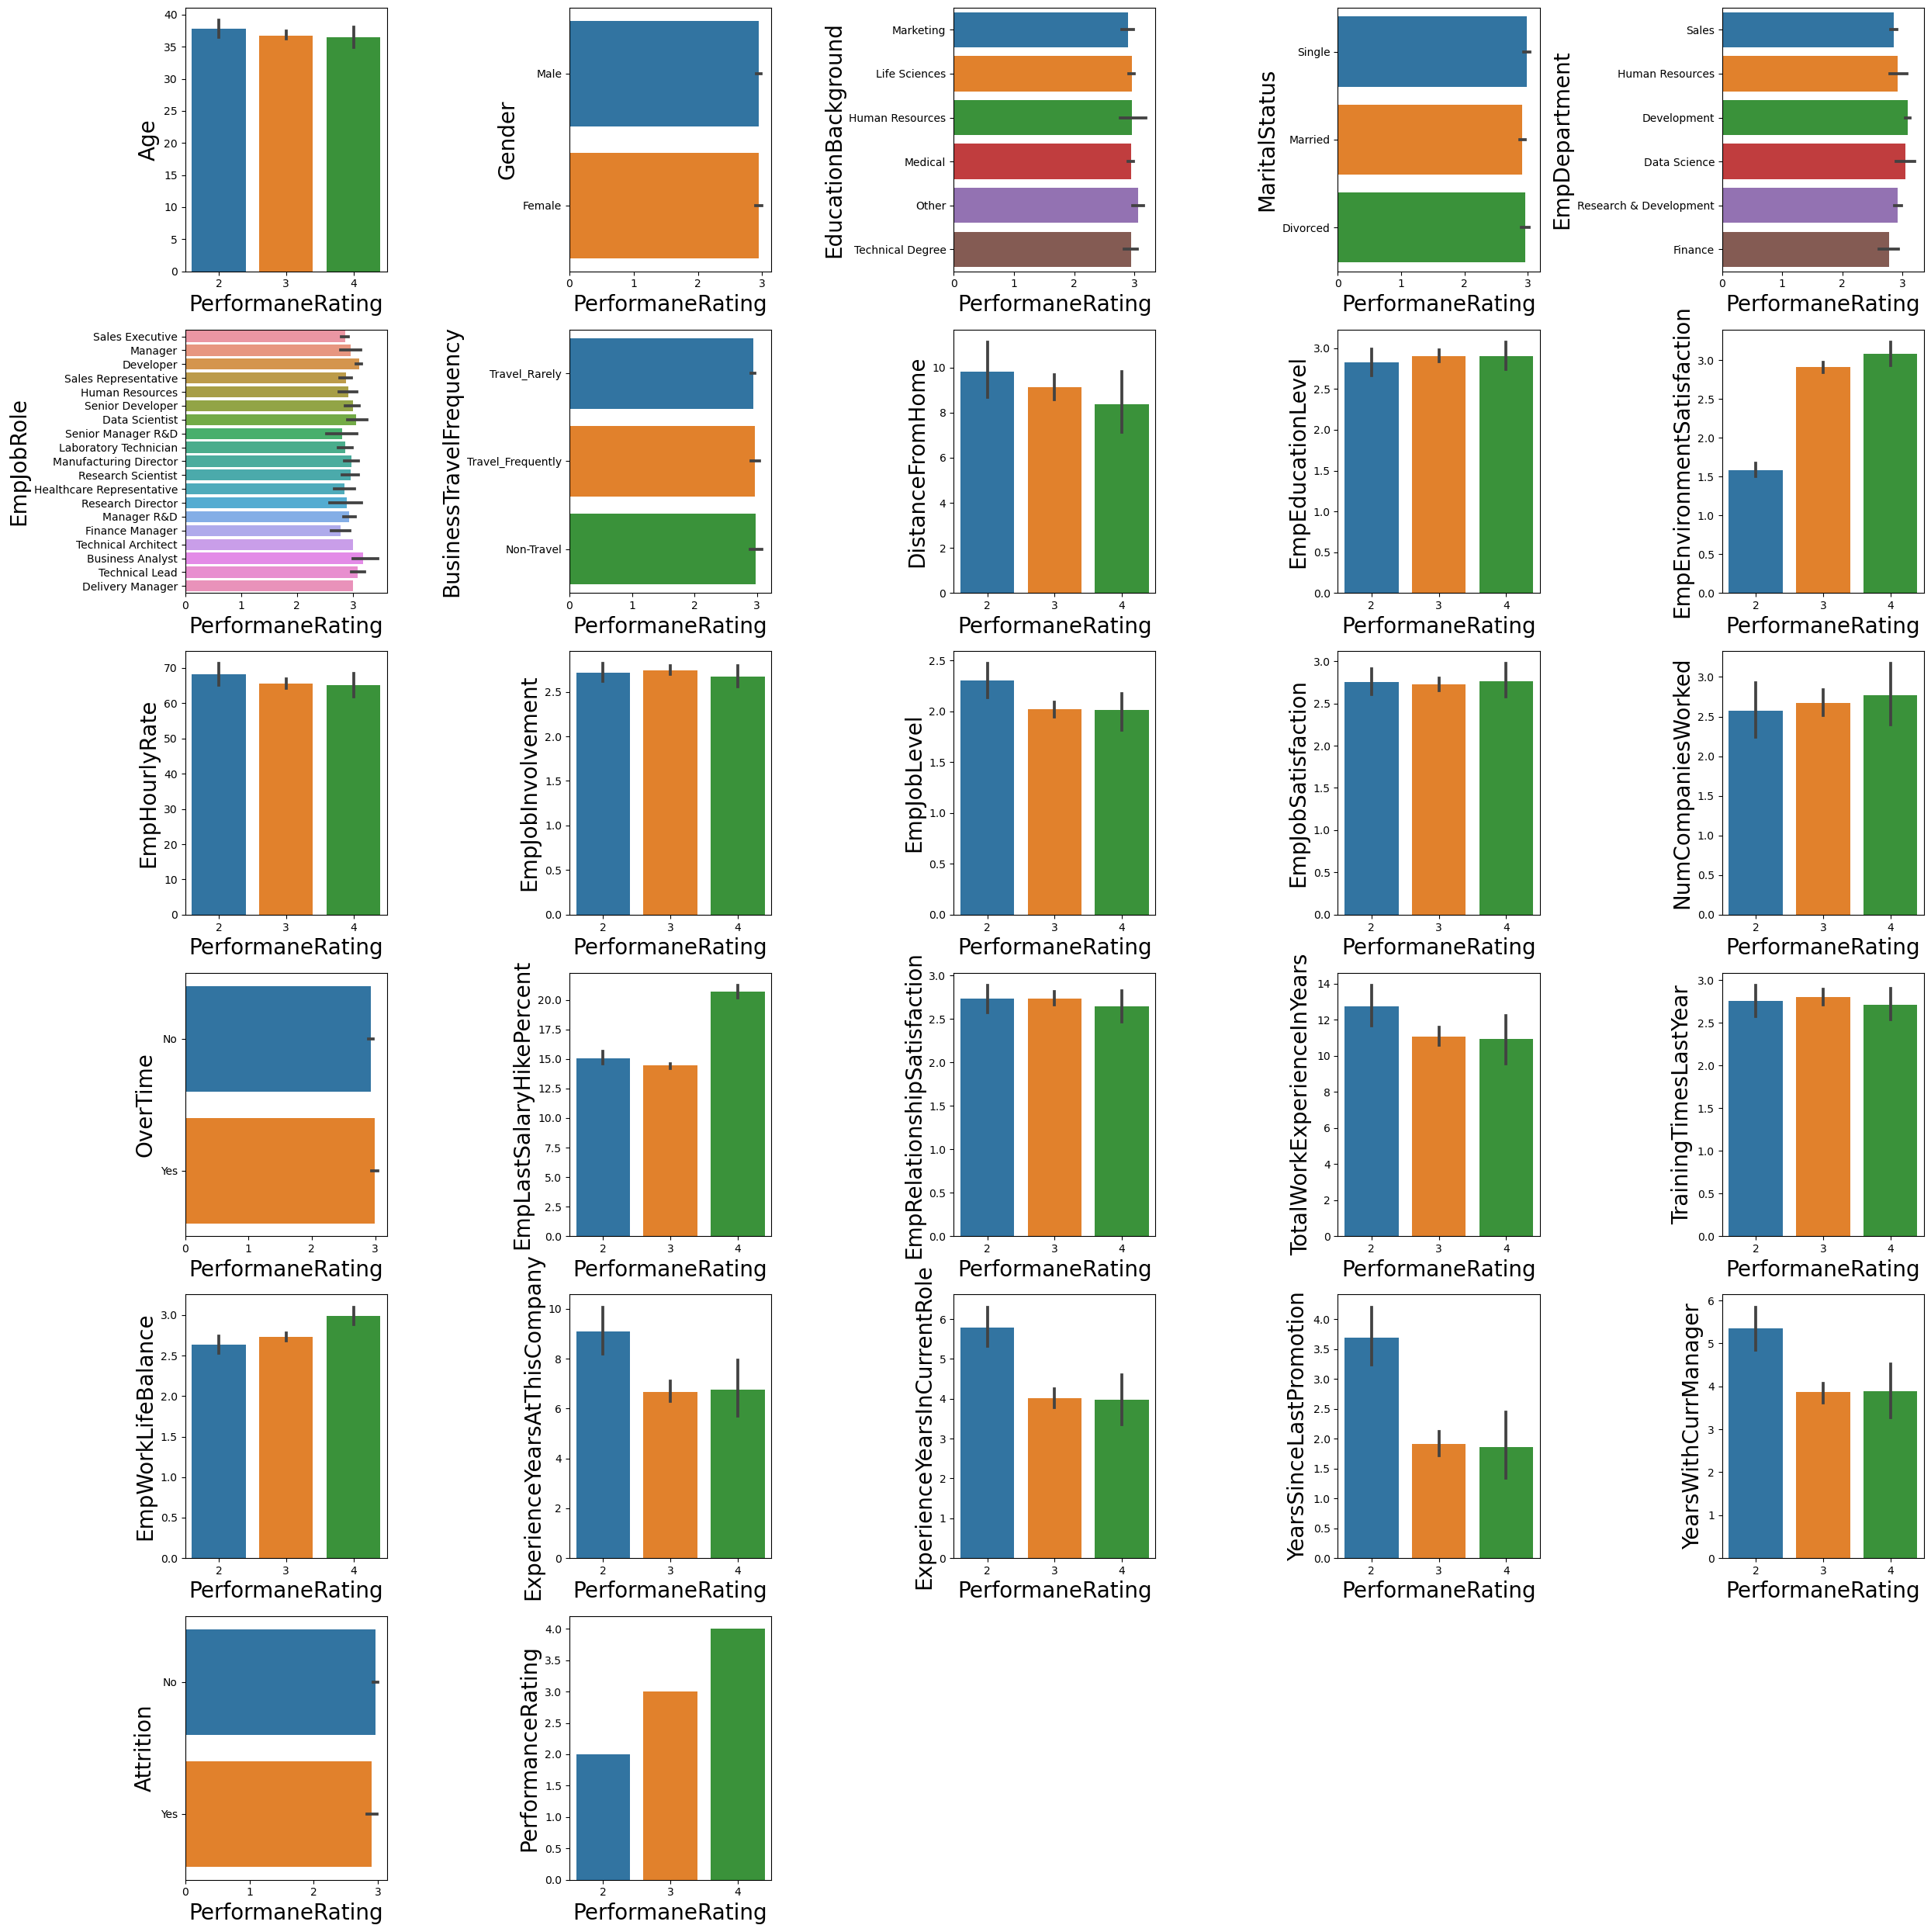

In [6]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in data:
    plt.subplot(6,5,plotnum)
    sns.barplot(x=data.PerformanceRating,y=data[c])
    plt.xlabel('PerformaneRating',fontsize=20)
    plt.ylabel(c,fontsize=20)
        
    plotnum+=1
plt.tight_layout() 

## Basic Checks

In [7]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [8]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## Scaling the numerical data

We scale the numerical data because machine learning model gives importance to the high values. Like it will prioritize "60" over "32". So we use scaling technique so that all the values should be in a certain range

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dl = ['PerformanceRating', 'Attrition', 'EmpWorkLifeBalance', 'EmpRelationshipSatisfaction', 
      'OverTime', 'EmpJobSatisfaction', 'EmpEducationLevel', 'BusinessTravelFrequency', 'EmpJobRole', 
      'EmpJobLevel', 'EmpJobInvolvement', 'EmpEnvironmentSatisfaction', 'EmpDepartment', 'MaritalStatus',
      'EducationBackground', 'Gender', ]
data1=sc.fit_transform(data.drop(dl,axis=1))

In [10]:
con_data = data[['PerformanceRating', 'Attrition', 'EmpWorkLifeBalance', 'EmpRelationshipSatisfaction', 
      'OverTime', 'EmpJobSatisfaction', 'EmpEducationLevel', 'BusinessTravelFrequency', 'EmpJobRole', 
      'EmpJobLevel', 'EmpJobInvolvement', 'EmpEnvironmentSatisfaction', 'EmpDepartment', 'MaritalStatus',
      'EducationBackground', 'Gender',]]

In [11]:
data2=pd.DataFrame(data1,columns=['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked', 
                                  'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
                                  'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
                                  'YearsWithCurrManager'])

In [12]:
final_df=pd.concat([data2,con_data],axis=1)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
final_df.head()

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,Attrition,EmpWorkLifeBalance,EmpRelationshipSatisfaction,OverTime,EmpJobSatisfaction,EmpEducationLevel,BusinessTravelFrequency,EmpJobRole,EmpJobLevel,EmpJobInvolvement,EmpEnvironmentSatisfaction,EmpDepartment,MaritalStatus,EducationBackground,Gender
0,0.333333,0.321429,0.357143,0.111111,0.071429,0.250,0.333333,0.250,0.388889,0.000000,0.470588,3,No,2,4,No,4,3,Travel_Rarely,Sales Executive,2,3,4,Sales,Single,Marketing,Male
1,0.690476,0.464286,0.171429,0.222222,0.071429,0.500,0.333333,0.175,0.388889,0.066667,0.411765,3,No,3,4,No,1,4,Travel_Rarely,Sales Executive,2,3,4,Sales,Single,Marketing,Male
2,0.523810,0.142857,0.257143,0.555556,0.714286,0.500,0.333333,0.450,0.722222,0.066667,0.705882,4,No,3,3,Yes,1,4,Travel_Frequently,Sales Executive,3,2,4,Sales,Married,Life Sciences,Male
3,0.547619,0.321429,0.614286,0.333333,0.285714,0.575,0.333333,0.525,0.333333,0.800000,0.352941,3,No,2,2,No,4,4,Travel_Rarely,Manager,5,2,2,Human Resources,Divorced,Human Resources,Male
4,1.000000,0.535714,0.771429,0.888889,0.214286,0.250,0.166667,0.050,0.111111,0.133333,0.117647,3,No,3,4,No,1,4,Travel_Rarely,Sales Executive,2,3,1,Sales,Single,Marketing,Male


## Converting categorical data into numerical

The categorical data should be converted into numerical before applying any machine learning model because machine learning models understand only numerical data. We have techniques to convert the data into numerical like one hot encoding, label encoding and using map function. Here, I have used "map" function and "label encoding"

In [15]:
final_df.Gender=final_df.Gender.map({'Male':1,'Female':0})


In [16]:
final_df.EducationBackground = final_df.EducationBackground.map({'Marketing' : 1, 'Life Sciences' : 2, 
                                                         'Human Resources' : 3, 'Medical' : 4, 'Other' : 5, 
                                                         'Technical Degree' : 6})

In [17]:
final_df.MaritalStatus = final_df.MaritalStatus.map({'Single' : 1, 'Married' : 2, 'Divorced' : 3})

In [18]:
final_df.EmpDepartment = final_df.EmpDepartment.map({'Sales' : 1, 'Human Resources' : 2, 'Development' : 3, 'Data Science' : 4,
                                            'Research & Development' : 5, 'Finance' : 6})

In [19]:
final_df.BusinessTravelFrequency = final_df.BusinessTravelFrequency.map({'Travel_Rarely' : 1, 'Travel_Frequently': 2,
                                                                 'Non-Travel' : 3})

In [20]:
final_df.Attrition = final_df.Attrition.map({'Yes' : 1, 'No' : 0})

In [21]:
final_df.OverTime = final_df.OverTime.map({'Yes': 1, 'No' : 0})

In [22]:
## Encoding MaritalStatus

from sklearn.preprocessing import LabelEncoder#importing label encoder from sklearn 

label = LabelEncoder()#object creation 
final_df.EmpJobRole=label.fit_transform(final_df.EmpJobRole)

In [23]:
final_df.head()

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,Attrition,EmpWorkLifeBalance,EmpRelationshipSatisfaction,OverTime,EmpJobSatisfaction,EmpEducationLevel,BusinessTravelFrequency,EmpJobRole,EmpJobLevel,EmpJobInvolvement,EmpEnvironmentSatisfaction,EmpDepartment,MaritalStatus,EducationBackground,Gender
0,0.333333,0.321429,0.357143,0.111111,0.071429,0.250,0.333333,0.250,0.388889,0.000000,0.470588,3,0,2,4,0,4,3,1,13,2,3,4,1,1,1,1
1,0.690476,0.464286,0.171429,0.222222,0.071429,0.500,0.333333,0.175,0.388889,0.066667,0.411765,3,0,3,4,0,1,4,1,13,2,3,4,1,1,1,1
2,0.523810,0.142857,0.257143,0.555556,0.714286,0.500,0.333333,0.450,0.722222,0.066667,0.705882,4,0,3,3,1,1,4,2,13,3,2,4,1,2,2,1
3,0.547619,0.321429,0.614286,0.333333,0.285714,0.575,0.333333,0.525,0.333333,0.800000,0.352941,3,0,2,2,0,4,4,1,8,5,2,2,2,3,3,1
4,1.000000,0.535714,0.771429,0.888889,0.214286,0.250,0.166667,0.050,0.111111,0.133333,0.117647,3,0,3,4,0,1,4,1,13,2,3,1,1,1,1,1


## Splitting data into train and test

In [24]:
X = final_df.drop(['PerformanceRating'], axis=1)
y = final_df.PerformanceRating

In [25]:
# Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

## Balancing the data using SMOTE technique

The provided dataset is imbalanced. The machine learning model will prioritize the most occuring values. We should balance the data so that ML model can treat all the values equally, Thus improving the overall results

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [27]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [28]:
y_train_smote.value_counts()

3    696
2    696
4    696
Name: PerformanceRating, dtype: int64

## Applying Machine Learning model (Logistic Regression)

In [29]:
# Step 3 Creating model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [30]:
y_pred=clf.predict(X_test)

## Evaluation of ML model

In [31]:
# Step 4 Model Evalution
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 23  11   5]
 [ 27 134  17]
 [  0   6  17]]


In [32]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.725

In [33]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.7746912746929303

In [34]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score

0.7406965295121465

In [35]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           2       0.46      0.59      0.52        39
           3       0.89      0.75      0.81       178
           4       0.44      0.74      0.55        23

    accuracy                           0.73       240
   macro avg       0.59      0.69      0.63       240
weighted avg       0.77      0.72      0.74       240



## Prediction using Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [37]:
y_hat = classifier.predict(X_test)

In [38]:
cr1=classification_report(y_test,y_hat)
print(cr1)

              precision    recall  f1-score   support

           2       0.80      0.82      0.81        39
           3       0.93      0.92      0.92       178
           4       0.64      0.70      0.67        23

    accuracy                           0.88       240
   macro avg       0.79      0.81      0.80       240
weighted avg       0.88      0.88      0.88       240



## Prediction using Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(X_train_smote, y_train_smote)
y_predict = clf1.predict(X_test)

In [40]:
cr2=classification_report(y_test,y_predict)
print(cr2)

              precision    recall  f1-score   support

           2       0.78      0.74      0.76        39
           3       0.92      0.90      0.91       178
           4       0.53      0.70      0.60        23

    accuracy                           0.85       240
   macro avg       0.75      0.78      0.76       240
weighted avg       0.86      0.85      0.86       240



In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_smote, y_train_smote)
y_pred1 = model.predict(X_test)

In [44]:
cr3=classification_report(y_test,y_pred1)
print(cr3)

              precision    recall  f1-score   support

           2       0.74      0.64      0.68        39
           3       0.90      0.87      0.88       178
           4       0.45      0.65      0.54        23

    accuracy                           0.81       240
   macro avg       0.70      0.72      0.70       240
weighted avg       0.83      0.81      0.82       240



## Top 3 important factors

In [45]:
feature_importance = model.feature_importances_

In [46]:
feature_importance_df = pd.DataFrame({"Feature" : X.columns, "importance" : feature_importance})

In [48]:
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [49]:
top_factors = feature_importance_df.head(3)

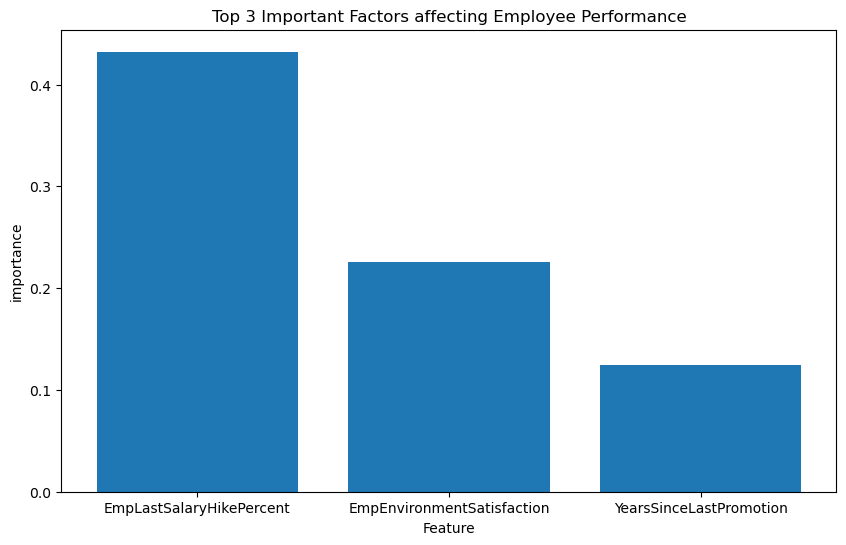

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(top_factors["Feature"], top_factors["importance"])
plt.xlabel("Feature")
plt.ylabel("importance")
plt.title("Top 3 Important Factors affecting Employee Performance")
plt.show()

## Conclusion & Recommendations:

##### We used different machine learning models like Logistics Regression, Decision Tree and Random Forest. We saw that Random Forest is giving the best result among all others i.e, 88%


The factors affecting the employee performance most are "EmpLastSalaryHikePercent", "EnvironmentSatisfaction" and "YearsSinceLastPromotion". The employee performance can be improved if we consider these three factors. The employees should be given promotion atleast once in a year. The enivronment should be improved, like there should be a small playing area which includes different sports like table tennis. Third and most important one is Salary hike perecent. The salary hike percent should be equal among all employees or else there should be a bonus for employees on different occasions like diwali, eid and other festivals.